<a href="https://colab.research.google.com/github/divy042000/Computer-Vision/blob/main/LoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code starts by importing necessary libraries: cv2 for computer vision operations, numpy for numerical operations, matplotlib.pyplot for visualization, requests for making HTTP requests, and BytesIO from io for handling binary data.

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

The download_image function takes a URL as input, uses the requests.get method to fetch the image data from the URL, and then decodes it using OpenCV's imdecode function. The result is an image represented as a NumPy array, which is then returned.

In [28]:
def download_image(url):
    # Download image from the provided URL
    response = requests.get(url)

    # Decode the image using OpenCV
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    return img

The apply_gaussian_blur function takes an image and a sigma value as input, applies Gaussian smoothing to the image using cv2.GaussianBlur, and returns the blurred image.

In [29]:
def apply_gaussian_blur(image, sigma):
    # Apply Gaussian smoothing to the image
    blurred_image = cv2.GaussianBlur(image, (3, 3), sigma)
    return blurred_image

The apply_log function takes an image as input and applies the Laplacian of Gaussian (LoG) by using the cv2.Laplacian function. The result is an image that emphasizes edges.

In [30]:
def apply_log(image):
    # Apply Laplacian of Gaussian (LoG) to detect edges
    laplacian_image = cv2.Laplacian(image, cv2.CV_8U)

    return laplacian_image

In [31]:
def visualize_results(original_image, blurred_image, laplacian_image):
    # Display the results using matplotlib
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Image after Gaussian Blurring
    plt.subplot(132)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Blurred Image')

    # Laplacian of Gaussian (LoG) Image (Edge Detection)
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2RGB))
    plt.title('Laplacian of Gaussian (LoG)')

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

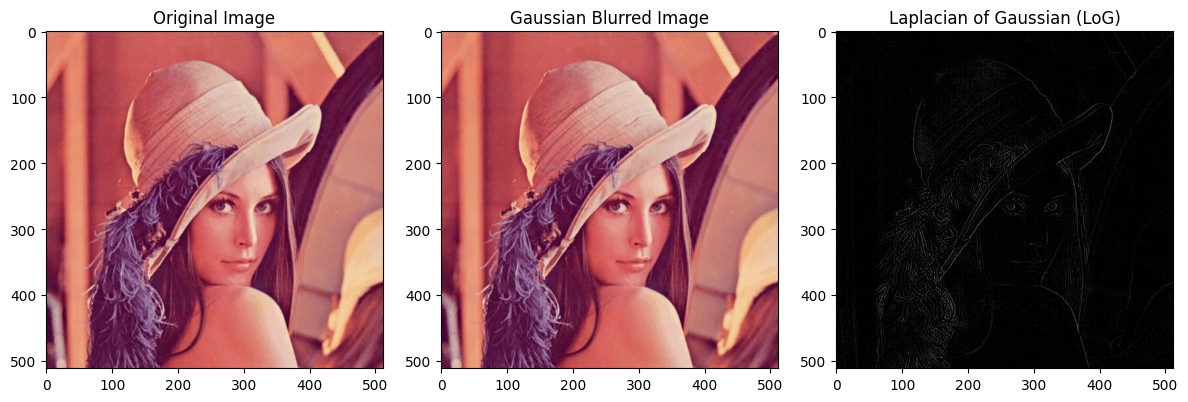

In [32]:
if __name__ == "__main__":
    # Specify the URL of a random image and the value of sigma for Gaussian smoothing
    random_image_url = "https://i.ibb.co/sRcg28H/lena-color.jpg"
    sigma = 0.1

    # Download the image
    original_image = download_image(random_image_url)

    # Apply Gaussian smoothing
    blurred_image = apply_gaussian_blur(original_image, sigma)

    # Apply LoG (Laplacian of Gaussian)
    laplacian_image = apply_log(blurred_image)

    # Visualize the results
    visualize_results(original_image, blurred_image, laplacian_image)


1. Explore the impact of different sigma values on the Gaussian blur and Laplacian of Gaussian (LoG) results.
2. Explore how different kernel sizes in the Gaussian blur operation affect the level of smoothing in the image.